### Linear Regression with Eager API

In [2]:
from __future__ import print_function, division, absolute_import
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/Users/Supra/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# eager api imports
tfe = tf.contrib.eager
tfe.enable_eager_execution()

In [6]:
# list of floats as the training samples
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# training parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [25]:
# no shape declared means scalar (inside is the initialized value)
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# linear regression func
def linear_regression(input_vals):
    return input_vals*W + b

# compute loss
def loss_fn(model_fn, input_vals, labels):
    return tf.reduce_sum(tf.pow(model_fn(input_vals) - labels, 2))/(2 * n_samples)

In [26]:
# optimization
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# compute gradients
grad = tfe.implicit_gradients(loss_fn)

Initial loss = 0.076928832 W:  0.25164887 b:  0.79870236
Epoch: 0001 loss = 0.076928847 W = 0.25164887 b = 0.7987025
Epoch: 0200 loss = 0.076928832 W = 0.25164554 b = 0.7987262
Epoch: 0400 loss = 0.076928839 W = 0.25164375 b = 0.7987389
Epoch: 0600 loss = 0.076928847 W = 0.25164205 b = 0.7987508
Epoch: 0800 loss = 0.076928847 W = 0.25164038 b = 0.79876274
Epoch: 1000 loss = 0.076928839 W = 0.2516387 b = 0.79877466
tf.Tensor(
[0.83040774 1.1072104  1.3840129  1.6884958  1.7438562  1.0488302
 2.4607751  1.5556306  1.9099379  0.5453011  1.7720398  2.7154334
 1.3369565  2.0123549  1.4227653  2.332691   0.78007996], shape=(17,), dtype=float32)


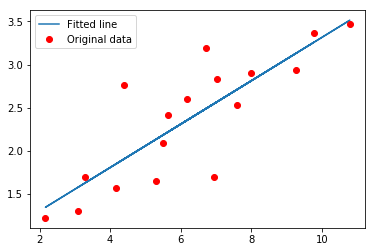

In [36]:
print("Initial loss = {:0.9f}".format(loss_fn(linear_regression, train_X, train_Y)),"W: ",W.numpy(),"b: ",b.numpy())

for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))
    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "loss = ",
              "{:.9f}".format(loss_fn(linear_regression, train_X, train_Y)),
              "W =", W.numpy(), "b =", b.numpy())
# W * train_X is a tf.Tensor and np.array(tf.Tensor) converts a tensor 
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()